<a href="https://colab.research.google.com/github/akoswn/html-portfolio/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [2]:
from google.colab import files
uploaded = files.upload()

red_wine = pd.read_csv("winequality-red.csv", sep=";")

Saving winequality-red.csv to winequality-red.csv


In [5]:
features = red_wine.drop(columns=['quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


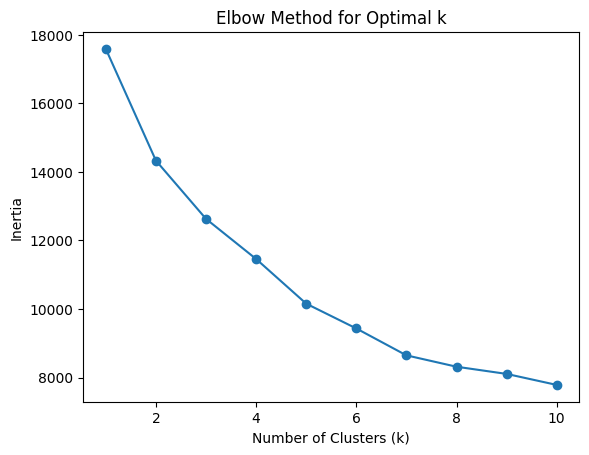

In [20]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
quality_correlation = red_wine.corr()['quality'].sort_values(ascending=False)

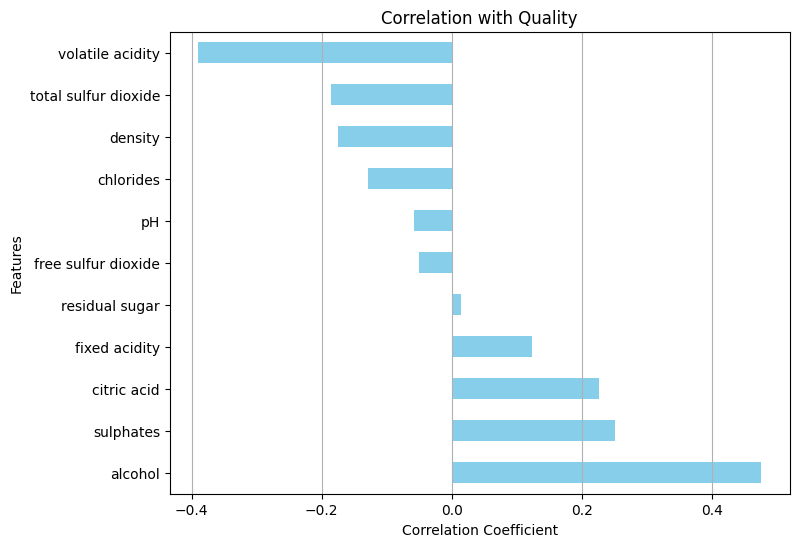

In [15]:
quality_correlation.drop('quality').plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Correlation with Quality')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

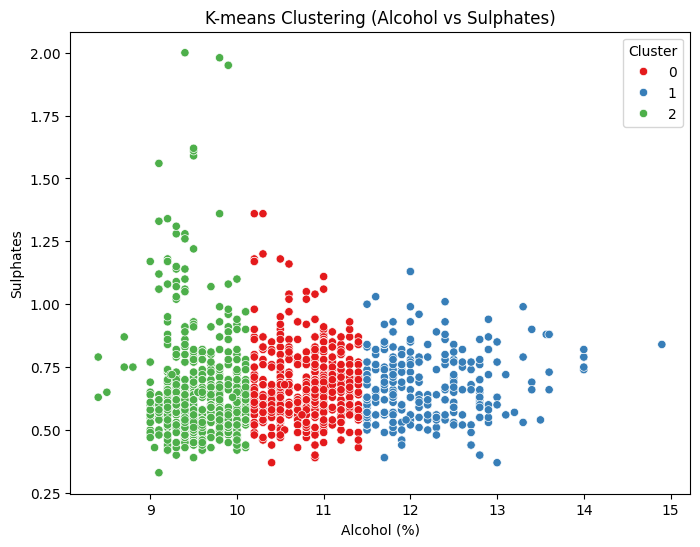

In [17]:

# Csak az alkoholtartalom és szulfátok
features = red_wine[['alcohol', 'sulphates']]

# K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features)
red_wine['cluster'] = kmeans.labels_

# Scatter plot a klaszterek vizualizálására
plt.figure(figsize=(8, 6))
sns.scatterplot(data=red_wine, x='alcohol', y='sulphates', hue='cluster', palette='Set1')
plt.title('K-means Clustering (Alcohol vs Sulphates)')
plt.xlabel('Alcohol (%)')
plt.ylabel('Sulphates')
plt.legend(title='Cluster')
plt.show()


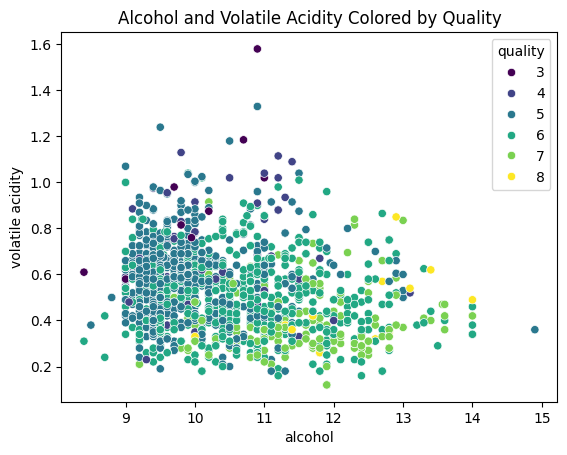

In [18]:
sns.scatterplot(data=red_wine, x='alcohol', y='volatile acidity', hue='quality', palette='viridis')
plt.title('Alcohol and Volatile Acidity Colored by Quality')
plt.show()

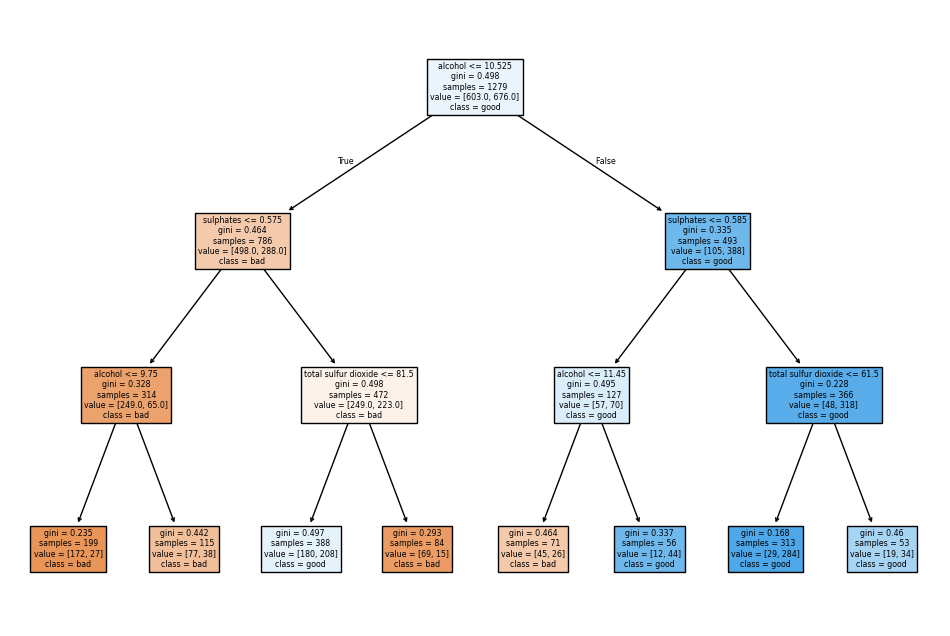

In [31]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')

X = red_wine.drop(columns=['quality', 'quality_label'])
y = red_wine['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)

plt.show()
